## C S 329E Term Project
## Enya Liu

My dataset is about Tokoyo's temperature change from 1825 to 2000. The recovered data were used for a preliminary calculation of the west-Japan temperature (WJT) series, which is a representative temperature series for the area. The existence of a warm epoch in the 1850s over W-Japan and a downward temperature trend till the early twentieth century, as previously inferred from documentary data, is confirmed from the WJT data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from yellowbrick.regressor import ResidualsPlot

In [2]:
df_t = pd.read_csv('~/Documents/pydata/t_tokyo.csv')
df_t

,TOKYO,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1825*,138,135,154,189,207,226,251,244,230,208,175,144
1,1826*,-999,138,187,191,217,249,271,263,233,200,178,147
2,1827*,136,-999,-999,-999,-999,-999,-999,-999,242,204,170,150
3,1828*,139,134,155,182,211,227,251,-999,-999,-999,-999,-999
4,1829,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1996,66,54,92,127,181,226,262,260,224,180,132,93
172,1997,68,70,105,152,192,227,266,270,229,187,143,92
173,1998,53,70,101,163,205,215,253,272,244,201,139,90
174,1999,66,67,101,150,199,228,259,285,262,195,142,90


Clean up dataset:
The values and years with uncertainty are marked with an asterisk and was removed from the dataset
The values of -999 in the dataset represent missing values and was removed from the dataset

In [3]:
# clean up dataset
# change TOKYO to years
df_t = df_t.rename(columns={'TOKYO':'year'})
# eliminate unknowns (-999)
df_t = df_t[(df_t['JAN'] != -999) & (df_t['FEB'] != -999) & (df_t['MAR'] != -999) & (df_t['APR'] != -999) & (df_t['MAY'] != -999)
         & (df_t['JUN'] != -999) & (df_t['JUL'] != -999) & (df_t['AUG'] != -999) & (df_t['SEP'] != -999) & (df_t['OCT'] != -999)
         & (df_t['NOV'] != -999) & (df_t['DEC'] != -999)]
# remove years with uncertain data and incontinuous years
df_t = df_t[(df_t['year'] != '1825*')].reset_index(drop=True)
df_t

,year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1839,28,33,63,124,181,213,276,271,225,162,106,53
1,1840,23,32,61,140,180,209,235,254,225,161,126,48
2,1841,12,13,61,128,170,200,266,248,210,157,95,34
3,1845,63,56,94,140,186,217,256,235,215,169,112,47
4,1846,45,50,79,140,176,222,249,265,257,184,104,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1996,66,54,92,127,181,226,262,260,224,180,132,93
136,1997,68,70,105,152,192,227,266,270,229,187,143,92
137,1998,53,70,101,163,205,215,253,272,244,201,139,90
138,1999,66,67,101,150,199,228,259,285,262,195,142,90


My research question: Predict the mean temperature of 2022 in Tokyo according to this dataset.
I want to learn from the dataset whether there is such a steady increase in Tokyo's temperature can be calculated uand predictd the average temperature of the coming year or not. 

To solve my research question, I will use classification as my learning model since this dataset contains labeled data and supervised learning.
My expectation is the mean temperature of 2022 in Tokyo increased and followed the trend shown in the scatter plot. 


/var/folders/k6/h394c66n2lbcf8y17ms07n280000gn/T/ipykernel_9434/2249239980.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_temp = df_t.drop('year',1)


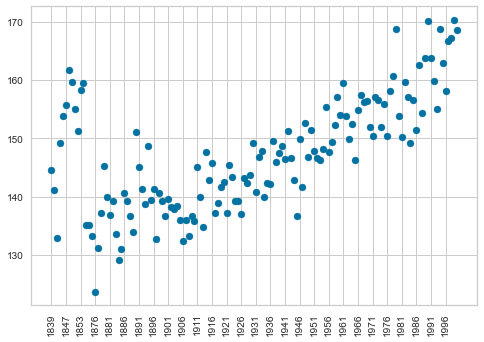

In [4]:
# find the mean temp of each year
df_temp = df_t.drop('year',1)
df_t['mean_temp'] = df_temp.mean(axis=1)

# make a scatter plot to see the trend here
plt.scatter(df_t['year'], df_t['mean_temp'])
plt.xticks(df_t['year'][::5],  rotation='vertical')
plt.show()

I compared several classifiers here. I plan to use linear regression here because my goal is to predict the response of a new observation of a given x, and the scatter plot has a linear trend there. I am pretty confident that simple linear regression works well here. Some other classifiers like Logistic regression is not suitable because the outcome of interest is not dichotomous in nature. 

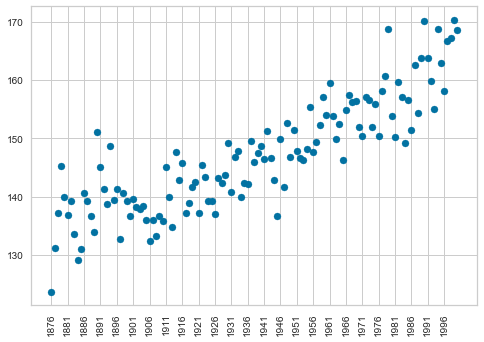

In [5]:
# remove nonlinear points first
df_lin = df_t.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# make a scatter plot to see the trend again
plt.scatter(df_lin['year'], df_lin['mean_temp'])
plt.xticks(df_lin['year'][::5],  rotation='vertical')
plt.show()

In [6]:
# check independent assumption
df_t.corr()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,mean_temp
JAN,1.000000,0.651438,0.545629,0.546108,0.601706,0.382428,0.223508,0.352277,0.331338,0.552588,0.603646,0.646568,0.762576
FEB,0.651438,1.000000,0.602613,0.575119,0.570884,0.348668,0.245356,0.341657,0.390356,0.559293,0.548376,0.579554,0.757184
MAR,0.545629,0.602613,1.000000,0.556167,0.555373,0.382011,0.263686,0.262351,0.377130,0.532056,0.542778,0.610859,0.732428
APR,0.546108,0.575119,0.556167,1.000000,0.565950,0.314483,0.330725,0.404285,0.410605,0.505997,0.542451,0.538111,0.730617
MAY,0.601706,0.570884,0.555373,0.565950,1.000000,0.442838,0.418374,0.461063,0.485036,0.603416,0.613743,0.556403,0.796234
JUN,0.382428,0.348668,0.382011,0.314483,0.442838,1.000000,0.378031,0.268954,0.340171,0.491288,0.479687,0.464796,0.609893
JUL,0.223508,0.245356,0.263686,0.330725,0.418374,0.378031,1.000000,0.480233,0.318230,0.336444,0.255439,0.236208,0.516997
AUG,0.352277,0.341657,0.262351,0.404285,0.461063,0.268954,0.480233,1.000000,0.439434,0.386672,0.429480,0.362469,0.597646
SEP,0.331338,0.390356,0.377130,0.410605,0.485036,0.340171,0.318230,0.439434,1.000000,0.563099,0.515969,0.385151,0.641185
OCT,0.552588,0.559293,0.532056,0.505997,0.603416,0.491288,0.336444,0.386672,0.563099,1.000000,0.731775,0.612163,0.798678


In [7]:
# regression
my_X = np.vstack((df_lin['year'], )).T
my_y = df_lin['mean_temp']
reg = LinearRegression().fit(my_X, my_y)
print(reg.coef_)
print(reg.intercept_)

# substitute 2022 into my_X here
# y = 0.234 x - 306.377
x = 2022
y = 0.23402048*x - 306.37702611367126
print('The expected mean temperature in 2022 in Tokyo is', int(y), 'F')
print()
print('This mean temperature of 166 F is higher than those mean temperatures from previous years.')
print('Our prediction is validate with our result that the mean temperature of Tokyo is increasing as time passed.')
print()

[0.23402048]
-306.37702611367126
The expected mean temperature in 2022 in Tokyo is 166 F.

This mean temperature of 166 F is higher than those mean temperatures from previous years.
Our prediction is validate with our result that the mean temperature of Tokyo is increasing as time passed.



It is unreasonable to have such a high estimated temperature in 2022. So I was thinking if the removing of those points were not necessary. Based on that, I recalculated the mean temperature again using the original data.

In [14]:
my_X = np.vstack((df_t['year'], )).T
my_y = df_t['mean_temp']
reg = LinearRegression().fit(my_X, my_y)
print(reg.coef_)
print(reg.intercept_)
x = 2022
y = 0.13668954*x - 116.36216508128462
print('The expected mean temperature in 2022 in Tokyo is', int(y), 'F.')

[0.13668954]
-116.36216508128462
The expected mean temperature in 2022 in Tokyo is 160 F.


However, one weakness of linear regression is that it’s easy to find correlation with linear regression,but it is hard to proof causation.This could be a further research in the future using other data like Tokyo's pressure dataset. 

Next, I evaluate my linear regression with regression score here. The best score could be 1.0 which means the model works perfectly fine with these data. 0.75 of the variability of the dependent variable in the data set has been explained by the regression model.

In [9]:
reg.score(my_X, my_y)

0.3636983359174323

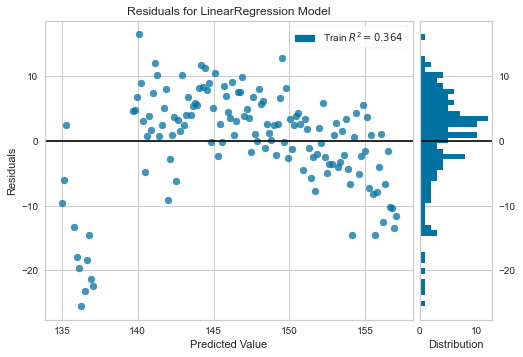

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
# residual plot
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, test_size=0.3, random_state=123)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(my_X, my_y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

After using simple linear regression, I am not very satisfied with a R^2 of 0.75. Besides, I also removed some nonlinear trend data from previous years, and I want to improve on my result. 
I want to try ridge linear model since it imposes a penalty on the size of the coefficients to address some of the problems of the simple linear regression. Ridge tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed. Ridge tends to give small but well distributed weights.
There are other linear models like Lasso and ElasticNet, which tend to give sparse weights and work well when there is a lot of predictors. It is not our case here.


In [11]:
# try least square regression here
my_X = my_X.astype(np.float64)
alpha = np.linalg.lstsq(my_X, my_y, rcond=None)[0]
print(alpha)


[0.07639249]


In [12]:
# ridge linear model
reg2 = linear_model.Ridge(alpha=.001)
reg2.fit(my_X, my_y)
print(reg2.coef_)
print(reg2.intercept_)
x = 2022
y = 0.23402048*x - 306.3770233269944
print('The expected mean temperature in 2022 in Tokyo is', int(y), 'F.')
print('There is a very tiny difference in the intercept with a different alpha value here.')

[0.13668954]
-116.36216407727034
The expected mean temperature in 2022 in Tokyo is 166 F.
There is a very tiny difference in the intercept with a different alpha value here.


In [13]:
reg2.score(my_X,my_y)

0.36369833591743195

The R^2 score is the same compared to previous R^2 score. Ridge linear model did not improve much. 

Reflection:
The temperature can not be 166 F which is very, very hot.\
Possible problem here is about the temperature unit. \
However, I do not know the unit for this dataset which needed to be explored more in the future. 

# Reference:
1.1. Linear Models. (2007). Retrieved 30 November 2021, from https://scikit-learn.org/stable/modules/linear_model.html
https://github.com/kiat/Elements-of-Data-Analytics/blob/main/Code-Example-011-Linear-Regression-Residual-Plots.ipynb